In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(12,6)

In [2]:
df = pd.read_csv("netflix.csv")
df.columns=df.columns.str.strip()

In [3]:
df.head()
df.shape
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')
df['rating']=df['rating'].fillna('Unknown')

In [6]:
import pandas as pd
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',errors='coerce') 

In [7]:
df['date_added'].dtype

dtype('<M8[ns]')

In [8]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [9]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

### 1. Content Type Distribution: Movies vs TV Shows

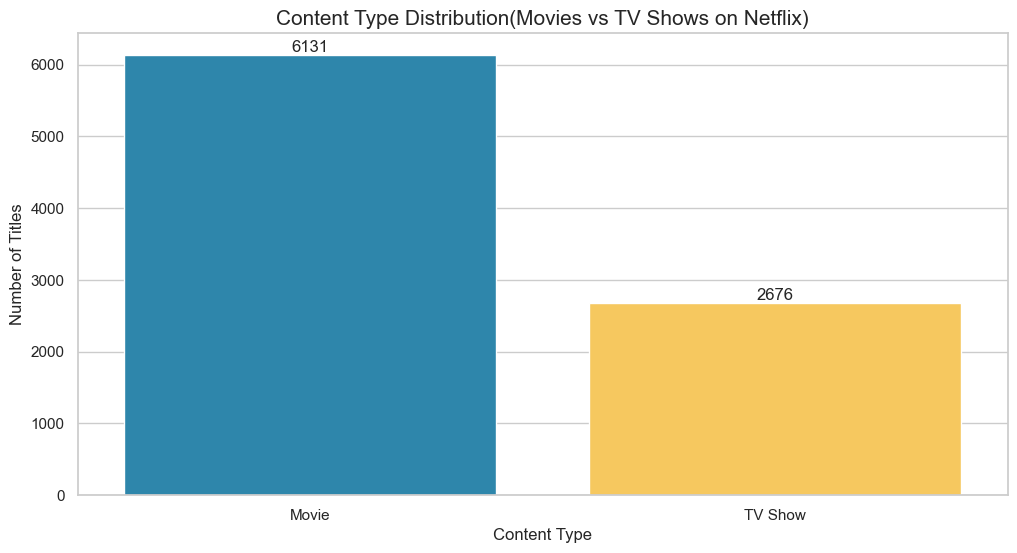

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='type',data=df,ax=ax)
ax.patches[0].set_facecolor('#2E86AB')
ax.patches[1].set_facecolor('#F6C85F')
ax.set_title("Content Type Distribution(Movies vs TV Shows on Netflix)",fontsize=15)
ax.set_xlabel("Content Type")
ax.set_ylabel("Number of Titles")
#Add value labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom')
plt.show()

### Insight:
Netflix's content library is dominated by Movies, which account for a significantly larger share compared to TV Shows.
This suggests that netflix historically focused more on movie-based content, which is quicker to produce and easier to scale globally.
### Bussiness Recommendation:
While Movies help expand the catalog rapidly, Netflix should continue increasing investment in TV Shows, 
as long-form content plays a crucial role in improving user engagement and long-term subscriber retention.

### 2. Most popular genres on Netflix globally.
Helps netflix prioritize genres for content aquisition or production.
Split multi-genre listings and counts

In [11]:
genres = df['listed_in'].str.split(',')

In [12]:
genres_explode=genres.explode()

In [13]:
top_genres=genres_explode.value_counts().head(10)
top_genres

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

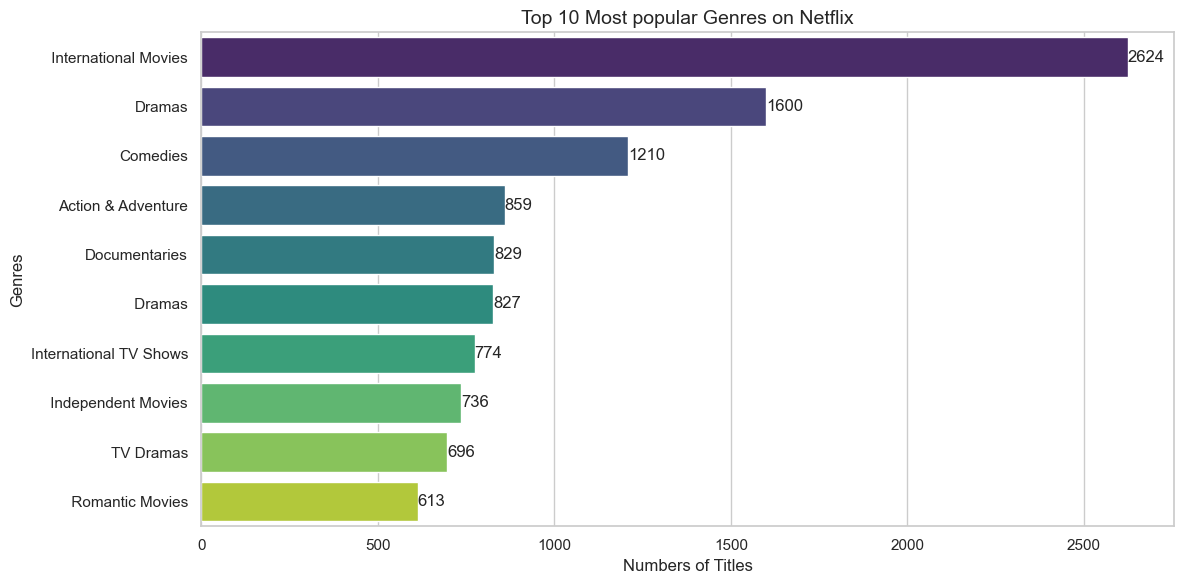

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,
    palette="viridis",legend=False,
    ax=ax)
ax.set_title("Top 10 Most popular Genres on Netflix",fontsize=14)
ax.set_xlabel("Numbers of Titles")
ax.set_ylabel("Genres")
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}",
                (p.get_width(),p.get_y()+p.get_height()/2),
                va='center',
                ha='left')
plt.tight_layout()
plt.show()

### Insight:
Drama is the most popular genre on Netflix globally, followed by International Movies and Comedies. 
This highlights strong viewer preference for emotionally engaging and culturally diverse content.

### Bussiness Recommendation:
Netflix should continue investing in Drama and International genres while expanding reginal and local-language content to 
strenthen its global market presence.

### 3. Content Released on Netflix by Year.

In [15]:
content_by_year=df['release_year'].value_counts().sort_index()
content_by_year.head()

release_year
1925    1
1942    2
1943    3
1944    3
1945    4
Name: count, dtype: int64

In [16]:
recent_content=content_by_year[content_by_year.index>=2000]

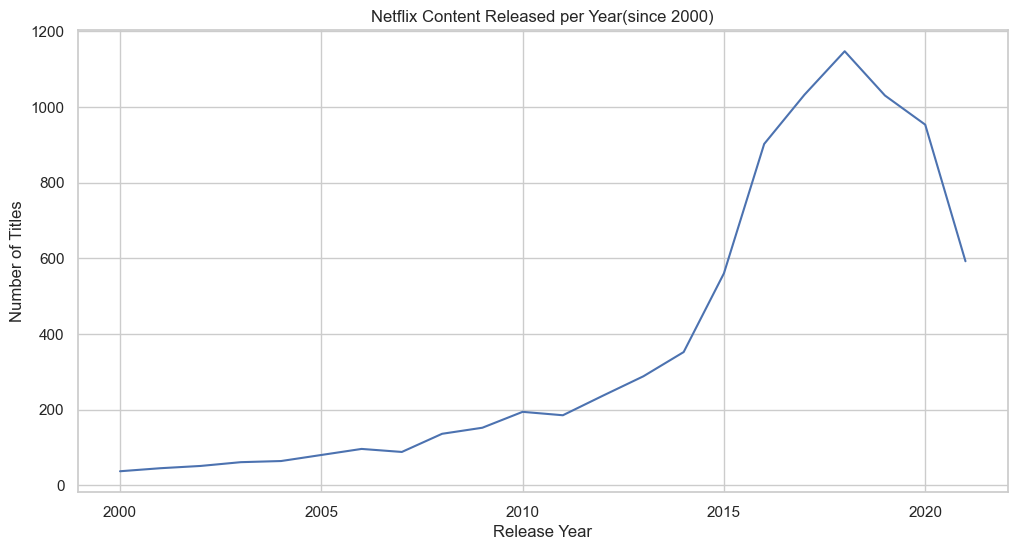

In [17]:
fig,ax=plt.subplots(figsize=(12,6))
plt.plot(recent_content.index,recent_content.values)
plt.title("Netflix Content Released per Year(since 2000)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

### Insights:
While Netflix's content library spans several decades, the majority of titles have been released in recent years, 
particularly after 2010. This highlights Netflix's aggressive expansion strategy focused on modern and relevent content.

### Business Recommendation:
Netflix should continue investing in contemporary content while leveraging historical data to identify long-term audience preferences.

### 4. Top Content-Producing contries on Netflix.

In [18]:
countries=df['country'].str.split(',')

In [19]:
countries_explode=countries.explode()

In [20]:
top_countries=countries_explode.value_counts().head(10)
top_countries

country
United States     3211
India             1008
Unknown            831
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Name: count, dtype: int64

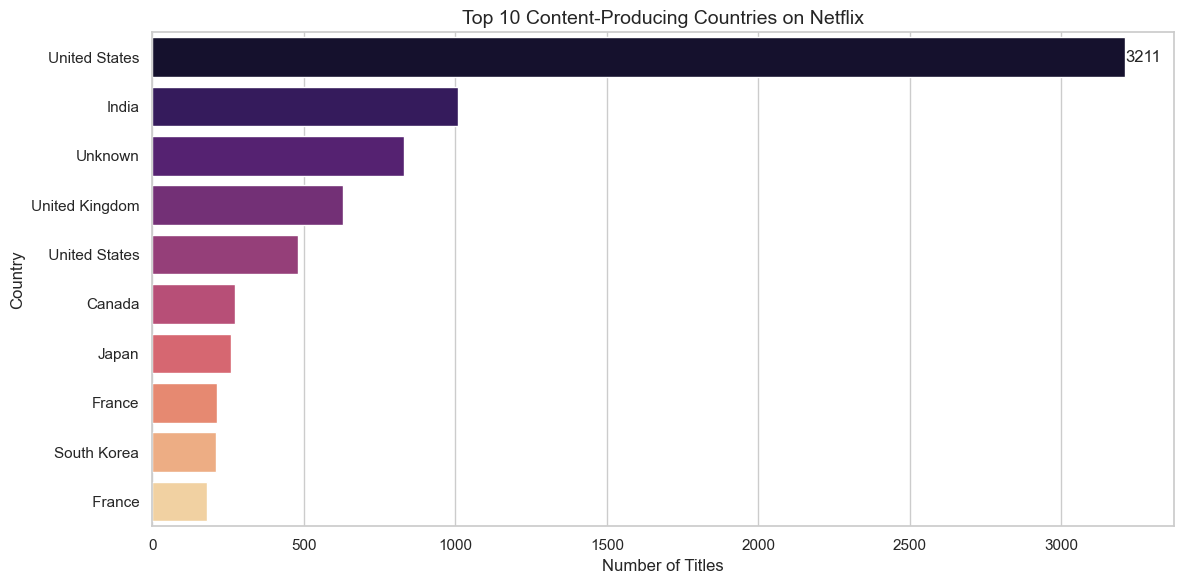

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [21]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=top_countries.values,
            y=top_countries.index,
            hue=top_countries.index,
            palette="magma",
            legend=False,
            ax=ax)
ax.set_title("Top 10 Content-Producing Countries on Netflix",fontsize=14)
ax.set_xlabel("Number of Titles")
ax.set_ylabel("Country")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        (p.get_width(),p.get_y()+p.get_height()/2),
        va='center',
        ha='left'
    )
    plt.tight_layout()
    plt.show()

### Insight:
The United States is the largest contributer to Netflix's content library, followed by India and the United Knigdom.
This highlights Netflix's strong presence in both mature and rapidly growing entertainment markets.

### Business Recommendation:
Netflix should continue strenthining partnerships in top-producing countries while increasing investments in emerging
markets to diversify content and attract a broader global audience.

### 5. How has the trend of adding new content evolved year by year?

In [22]:
content_by_year=df['year_added'].value_counts().sort_index()
content_by_year.head()

year_added
2008.0     2
2009.0     2
2010.0     1
2011.0    13
2012.0     3
Name: count, dtype: int64

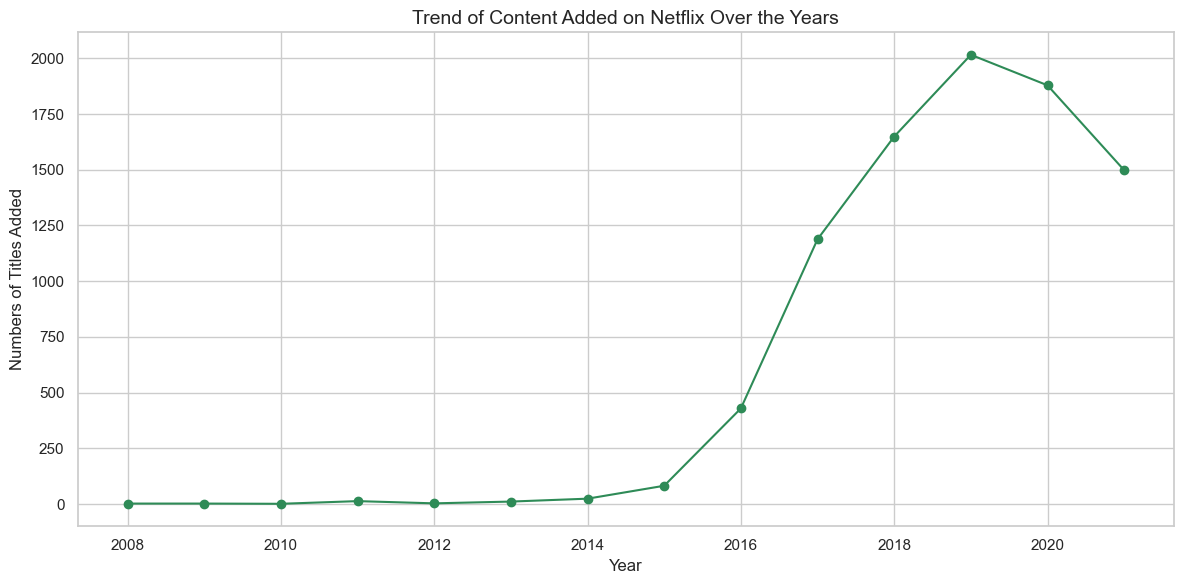

In [23]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(content_by_year.index, content_by_year.values,
        marker='o',linestyle='-',color='#2E8B57'
       )
ax.set_title("Trend of Content Added on Netflix Over the Years",fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Numbers of Titles Added")
plt.tight_layout()
plt.show()

### Insight:
Netflix shows a strong upward trend in content additions over the years, with a significant acceleration after 2016. 
This reflects Netflix's aggressive global expansion and increasing investment in original and licensed content.

### Business Recommendation:
Netflix should continue a data-driven content investment strategy, focusing on maintaining a steady flow of new releases 
while optimizing quality over quantity in recent years to sustain subscriber growth and engagement.

### 6. Most Frequent Ratings on Netflix(e.g., TV-MA, PG, etc.)

In [24]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64

In [25]:
top_ratings=df['rating'].value_counts().head(10)
top_ratings

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

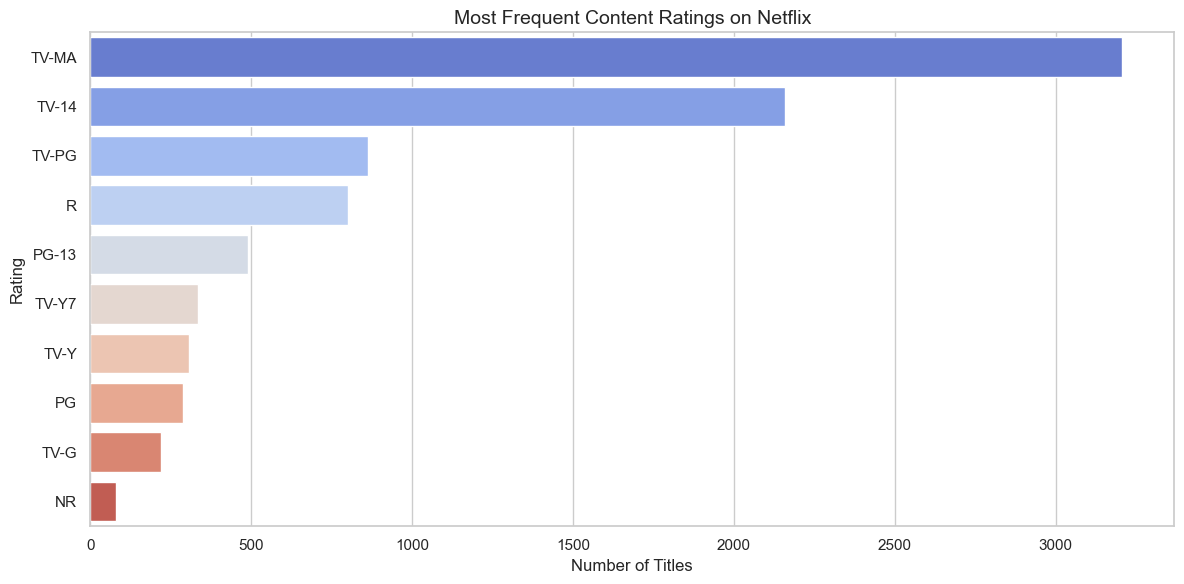

In [26]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=top_ratings.values,
            y=top_ratings.index,
            hue=top_ratings.index,
            palette="coolwarm")
plt.title("Most Frequent Content Ratings on Netflix",fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### Insight:
TV-MA is the most frequent rating on Netflix, followed by TV-14 and TV-PG. This indicates that Netflix primarily targets
mature and young-adult audiences with its content offferings.

### Business Recommendation:
Netflix should continue focusing on TV-MA and TV-14 content to retain its core audience while selectively increasing family-friendly
content to attract a broader subcriber base.

### 7. Do some Countries tend to produce more mature content(TV-MA)?

In [27]:
tv_ma_df=df[df['rating']=='TV-MA']

In [28]:
tv_ma_countries=tv_ma_df['country'].str.split(',').explode()

In [29]:
tv_ma_country_counts=tv_ma_countries.value_counts().head(10)
tv_ma_country_counts

country
United States     986
Unknown           276
India             260
United Kingdom    225
Spain             143
 United States    115
France            114
Mexico             92
Japan              91
South Korea        89
Name: count, dtype: int64

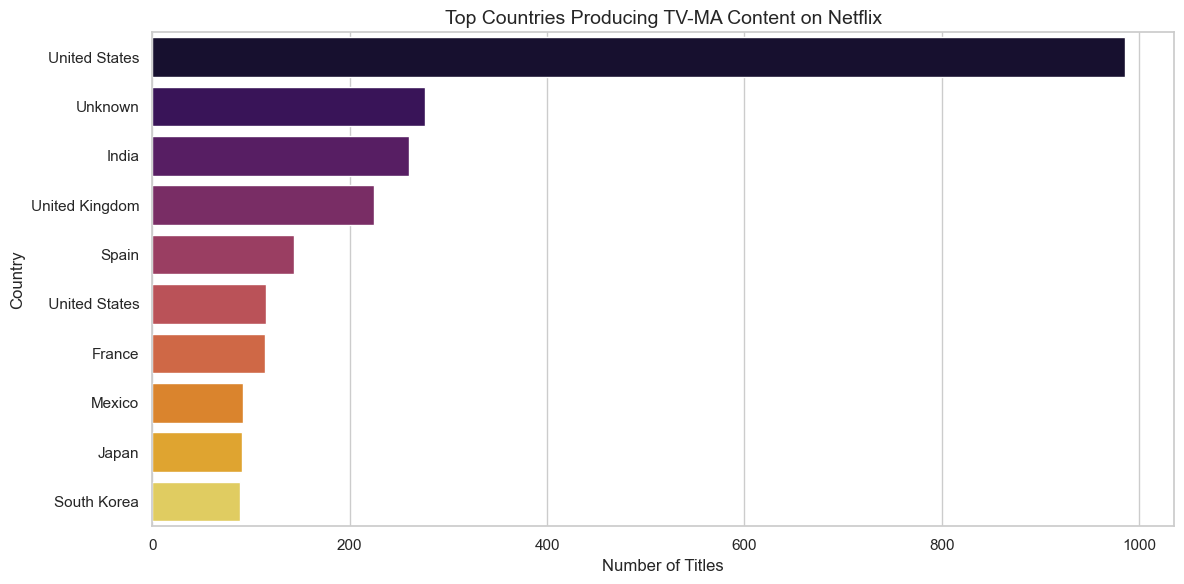

In [30]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(
    x=tv_ma_country_counts.values,
    y=tv_ma_country_counts.index,
    hue=tv_ma_country_counts.index,
    palette="inferno")
plt.title("Top Countries Producing TV-MA Content on Netflix",fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Insights:
THe United States produces the highest number of TV-MA rated titles on Netflix, followed by the United Kingdom and Canada, 
indicating that mature content is largely driven by Western markets.

### Business Recommendation:
Netflix should continue leveraging mature-content-heavy regions while adapting content maturity to regional regulations and cultural preferences.

 ### 8. Which genres are more associated with TV Shows vs Movies?

In [31]:
genre_type_df=df[['type','listed_in']].copy()

In [32]:
genre_type_df['listed_in']=genre_type_df['listed_in'].str.split(',')
genre_type_df=genre_type_df.explode('listed_in')

In [33]:
movie_genres=(genre_type_df[genre_type_df['type']=='Movie']['listed_in'].value_counts().head(10))
movie_genres

listed_in
 International Movies       2624
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
 Independent Movies          736
 Romantic Movies             613
Children & Family Movies     605
 Thrillers                   512
Name: count, dtype: int64

In [34]:
tv_genres=(genre_type_df[genre_type_df['type']=='TV Show']['listed_in'].value_counts().head(10))
tv_genres

listed_in
International TV Shows     774
 TV Dramas                 696
 International TV Shows    577
 TV Comedies               461
Crime TV Shows             399
Kids' TV                   388
 Romantic TV Shows         338
British TV Shows           253
Docuseries                 221
Anime Series               176
Name: count, dtype: int64

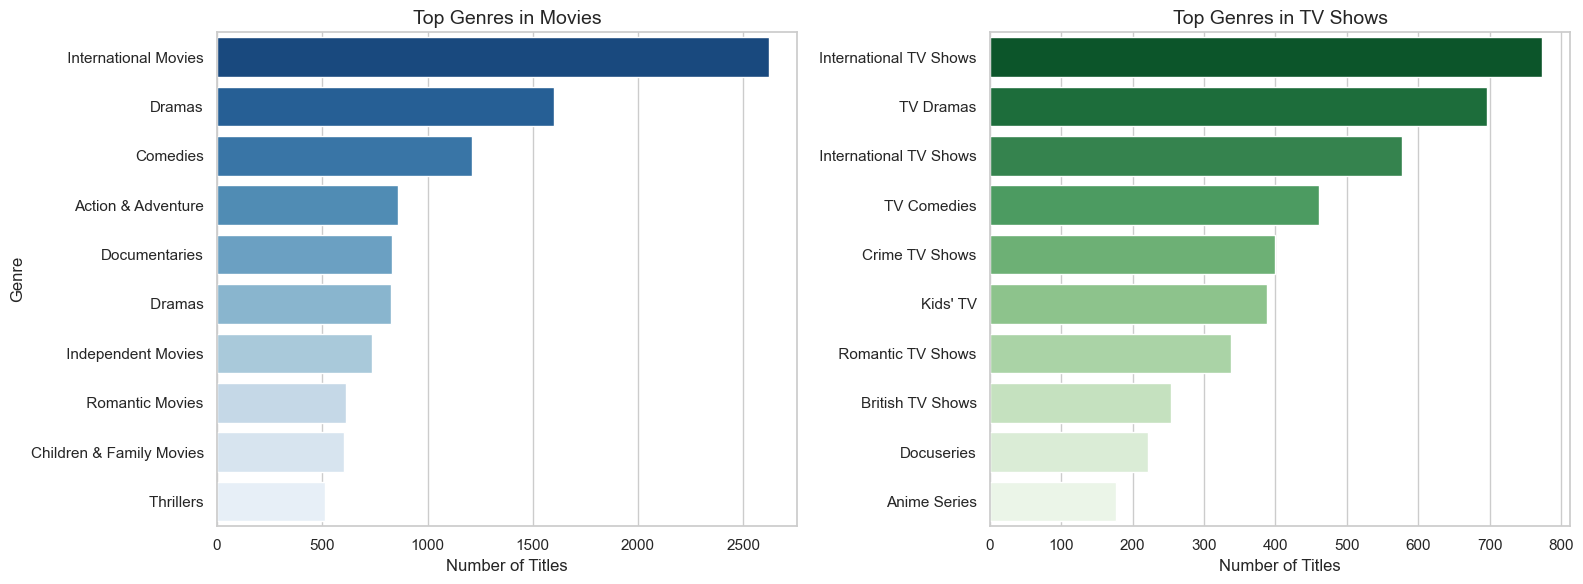

In [35]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
#movies
sns.barplot(x=movie_genres.values,y=movie_genres.index,
            ax=ax[0],
            hue=movie_genres.index,
            palette="Blues_r")
ax[0].set_title("Top Genres in Movies",fontsize=14)
ax[0].set_xlabel("Number of Titles")
ax[0].set_ylabel("Genre")
#TV Shows
sns.barplot(x=tv_genres.values,
            y=tv_genres.index,
            ax=ax[1],
            hue=tv_genres.index,
            palette="Greens_r")
ax[1].set_title("Top Genres in TV Shows",fontsize=14)
ax[1].set_xlabel("Number of Titles")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

### Insight:
Movies on Netflix are dominated by genres such as Drama, International Movies, and comedies, which are well-suited for standalone 
storytelling. In contrast, TV Shows are more strongly associated with genres like TV Dramas, International TV Shows, and reality TV,
which benefit from episodic and long-form narratives.

### Business Recommendation:
Netflix should continue producing Drama and Comedy content as Movies while focusing on TV Dramas, Reality TV, and International series 
in TV Show format to maximize viewer engagement and retention.

### 9. Which genre dominates the U.S. vs other countries?

In [36]:
geo_df=df[['country','listed_in']].dropna().copy()

In [37]:
geo_df['country']=geo_df['country'].str.split(',')
geo_df['listed_in']=geo_df['listed_in'].str.split(',')

In [38]:
geo_df=geo_df.explode('country')
geo_df=geo_df.explode('listed_in')
geo_df['country']=geo_df['country'].str.strip()
geo_df['listed_in']=geo_df['listed_in'].str.strip()

In [39]:
us_df=geo_df[geo_df['country']=='United States']
other_df=geo_df[geo_df['country']!='United States']

In [40]:
us_top_genres=us_df['listed_in'].value_counts().head(10)
other_top_genres=other_df['listed_in'].value_counts().head(10)
us_top_genres,other_top_genres

(listed_in
 Dramas                      835
 Comedies                    680
 Documentaries               512
 Action & Adventure          404
 Children & Family Movies    390
 Independent Movies          390
 Thrillers                   292
 TV Comedies                 258
 TV Dramas                   232
 Romantic Movies             225
 Name: count, dtype: int64,
 listed_in
 International Movies      3347
 Dramas                    2367
 International TV Shows    1391
 Comedies                  1301
 Action & Adventure         778
 Independent Movies         650
 TV Dramas                  620
 Documentaries              606
 Thrillers                  514
 Romantic Movies            497
 Name: count, dtype: int64)

In [41]:
us_top_genres
other_top_genres

listed_in
International Movies      3347
Dramas                    2367
International TV Shows    1391
Comedies                  1301
Action & Adventure         778
Independent Movies         650
TV Dramas                  620
Documentaries              606
Thrillers                  514
Romantic Movies            497
Name: count, dtype: int64

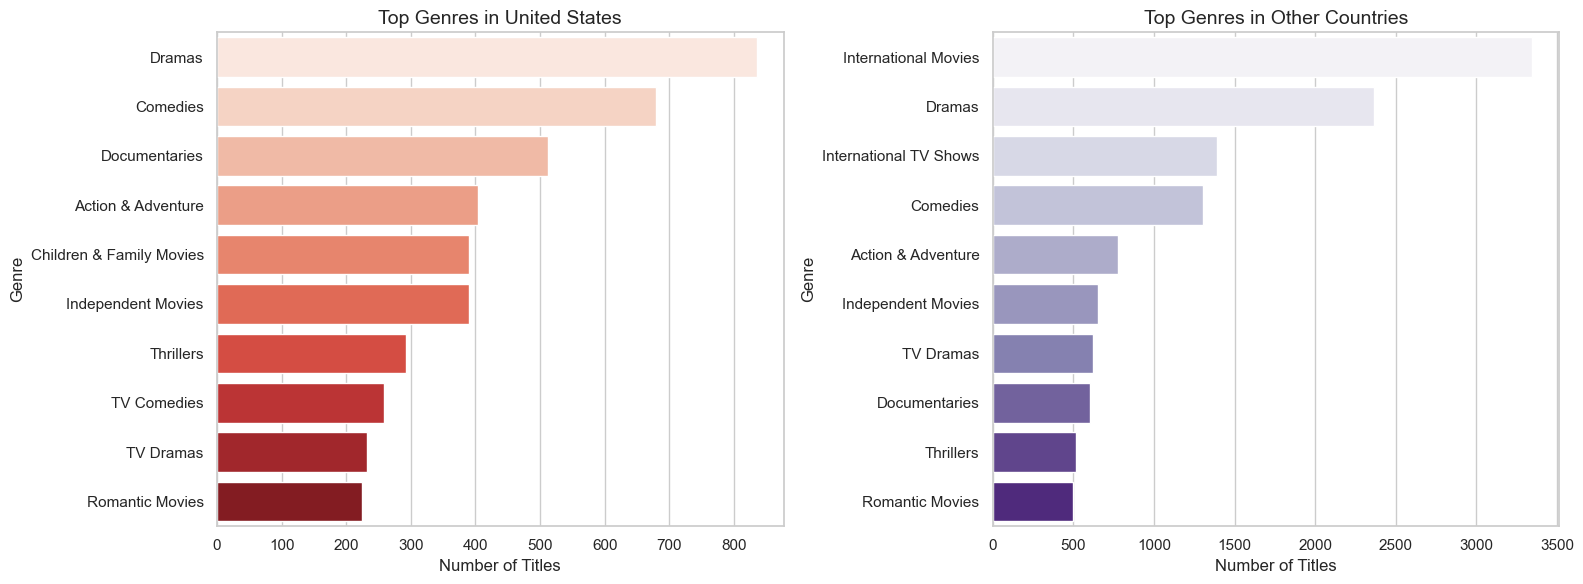

In [42]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
#United States
sns.barplot(x=list(us_top_genres.values),
            y=list(us_top_genres.index),
            ax=ax[0],
            hue=list(us_top_genres.index),
            palette='Reds')
ax[0].set_title("Top Genres in United States",fontsize=14)
ax[0].set_xlabel("Number of Titles")
ax[0].set_ylabel("Genre")
#Other Countries
sns.barplot(x=list(other_top_genres.values),
            y=list(other_top_genres.index),
            ax=ax[1],
            hue=list(other_top_genres.index),
            palette='Purples')
ax[1].set_title("Top Genres in Other Countries",fontsize=14)
ax[1].set_xlabel("Number of Titles")
ax[1].set_ylabel("Genre")
plt.tight_layout()
plt.show()

### Insight:
-The United States catalog is dominated by Drama, Comedies, and Documentries.<br>
-Internation Markets show Stronger presence of International Movies, Dramas, and Regional content.

### Business Recommendation:
-Netflix should localize content strategies:<br>
-Focus on high-budget dramas & documentries for the U.S.<br>
-Invest in regional language films and culturally relevent genres for international markets.<br>

### 10. What genres are most popular in the last three years?

In [43]:
df['year_added']=pd.to_numeric(df['year_added'],
errors='coerce')

In [44]:
latest_years=df['year_added'].dropna().sort_values(ascending=False).unique()[:3]
latest_years

array([2021., 2020., 2019.])

In [45]:
recent_df=df[df['year_added'].isin(latest_years)].copy()

In [46]:
recent_df['listed_in']=recent_df['listed_in'].str.split(',')
recent_df=recent_df.explode('listed_in')

In [47]:
top_recent_genres=recent_df['listed_in'].value_counts().head(10)
top_recent_genres

listed_in
 International Movies       1513
Dramas                       973
Comedies                     789
Action & Adventure           568
 Dramas                      538
International TV Shows       474
 Romantic Movies             435
 Independent Movies          426
 TV Dramas                   426
Children & Family Movies     410
Name: count, dtype: int64

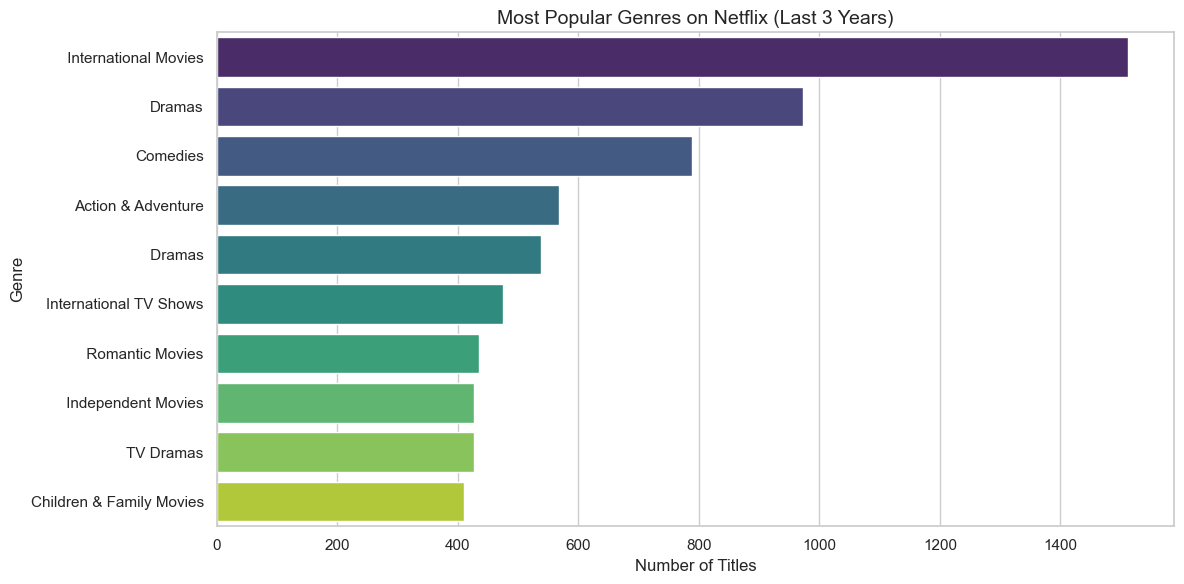

In [48]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=top_recent_genres.values,
            y=top_recent_genres.index,
            hue=top_recent_genres.index,
            palette='viridis')
plt.title('Most Popular Genres on Netflix (Last 3 Years)',fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Insight:
In the last three years, Drama, International Movies, and Comedies have been the most popular genres on Netflix.<br>
This trend highlights strong viewer demand for emotionally engaging stories, culturally diverse content, and light-hearted entertainment. The continued dominance of International Movies reflects Netflix's growing global audience and increasing acceptance of non-english and regionaal content.

### Business Recommendation:
Netflix should continue prioritizing Drama, International Movies, and Comedy genres in its content strategy.<br>
Investing in region-specific dramas and international storytelling can help Netflix strenthen its global market presence, increase user engagement, and improve long-term subscriber retention. Additionallly, blending local narratives with popular global genres can maximize audience reach.

### 11. Who are the top 10 directors with the most Netflix content?

In [49]:
director_df=df[['director']].dropna()

In [50]:
director_df['director']=director_df['director'].str.split(',')

In [51]:
director_df=director_df.explode('director')

In [52]:
director_df['director']=director_df['director'].str.strip()

In [53]:
director_df=director_df[director_df['director']!='Unknown']

In [54]:
top_directors=director_df['director'].value_counts().head(10)
top_directors

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64

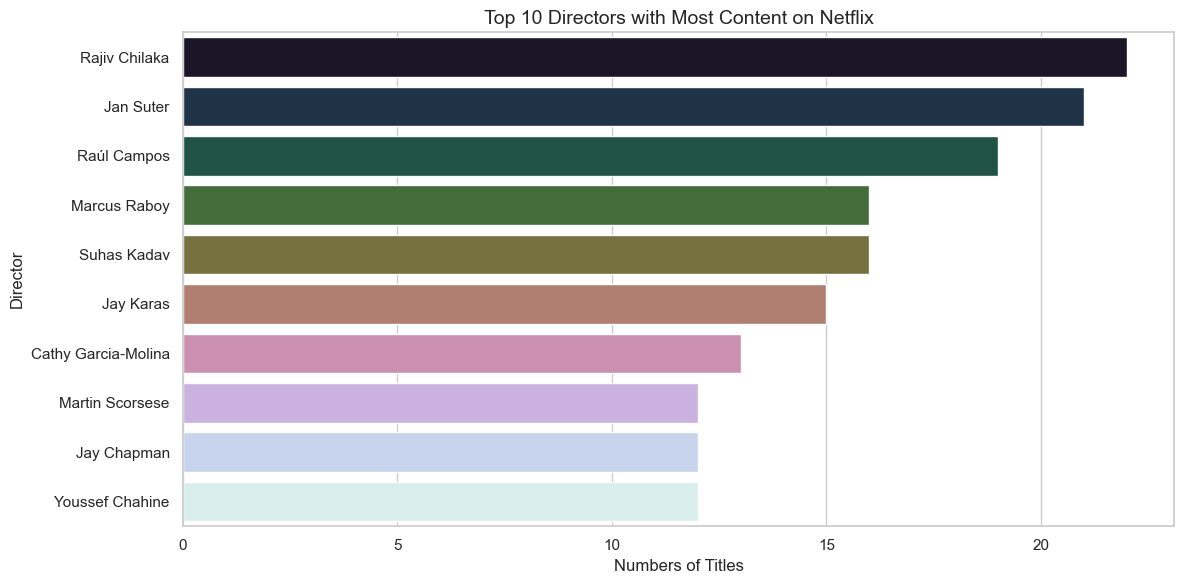

In [55]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=top_directors.values,
            y=top_directors.index,
            hue=top_directors.index,
            palette='cubehelix')
plt.title('Top 10 Directors with Most Content on Netflix',fontsize=14)
plt.xlabel('Numbers of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

### Insight:
A small group of directors contributes a significant portion of Netflix's content library. These directors appear repeatedly across movies and TV shows, indicating Netflix's preferences for working with familiar and reliable creators.

### Business Recommendation:
Netflix should strengthen partnerships with its most frequently featured directors by offering long-term contracts or exclusive deals.
Collaborating consistently with proven directors can reduce production risk, maintain content quality, and improve audience retention.

### 12. Which Actors appear most frequently on Netflix titles?

In [56]:
actors_df=df[['cast']].copy()

In [57]:
actors_df=actors_df[actors_df['cast'].notna()]

In [58]:
actors_df['cast']=actors_df['cast'].str.split(',')

In [59]:
actors_df=actors_df.explode('cast')

In [60]:
actors_df['cast']=actors_df['cast'].str.strip()

In [61]:
actors_df=actors_df[actors_df['cast']!='Unknown']

In [62]:
top_actors=actors_df['cast'].value_counts().head(10)
top_actors

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

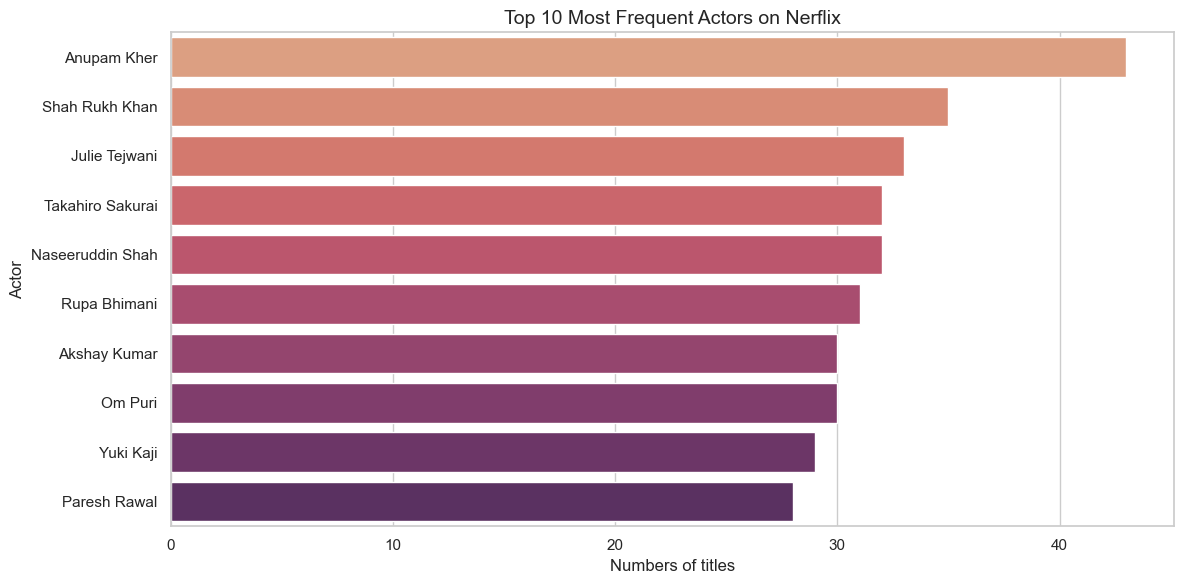

In [63]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=top_actors.values,
            y=top_actors.index,
            hue=top_actors.index,
            palette='flare')
plt.title('Top 10 Most Frequent Actors on Nerflix',fontsize=14)
plt.xlabel('Numbers of titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

### Insight:
-A small group od actors appears repeatedly across Netflix titles.<br>
-These actors often work in multiple genres and regions, increasing their visibility.<br>
-Frequent appearences suggest strong collaboration between netflix and these actors or their production networks.<br>
-such actors contribute sigmificantly to audience familiarity and platform loyalty.

### Business Recommendation:
-Netflix should continue strategic partnerships with high-frequency actors to maintain consistent audience engagement.<br>
-Promote content featuring these actors more aggressive in recommendations and marketing campaigns.<br>
-Explore exclusive multi-project contracts with popular actors to strengthen brand association.<br>
-Balance frequent actors with new talent to avoid content fatigue while sustaining viewer interest.

### 13. Which director-genre pairs are most frequent on Netflix?

In [64]:
dg_df=df[['director','listed_in']].dropna().copy()

In [65]:
dg_df['listed_in']=dg_df['listed_in'].str.split(',')

In [66]:
dg_df=dg_df.explode('listed_in')

In [67]:
dg_df['listed_in']=dg_df['listed_in'].str.strip()

In [68]:
dg_df=dg_df[dg_df['director'].str.lower()!='unknown']

In [69]:
dg_df['director_genre']=dg_df['director']+"|"+dg_df['listed_in']

In [70]:
top_director_genre=dg_df['director_genre'].value_counts().head(10)
top_director_genre

director_genre
Rajiv Chilaka|Children & Family Movies      19
Raúl Campos, Jan Suter|Stand-Up Comedy      18
Suhas Kadav|Children & Family Movies        16
Marcus Raboy|Stand-Up Comedy                15
Jay Karas|Stand-Up Comedy                   13
Cathy Garcia-Molina|International Movies    13
Jay Chapman|Stand-Up Comedy                 12
Youssef Chahine|Dramas                      12
Youssef Chahine|International Movies        10
Martin Scorsese|Dramas                       9
Name: count, dtype: int64

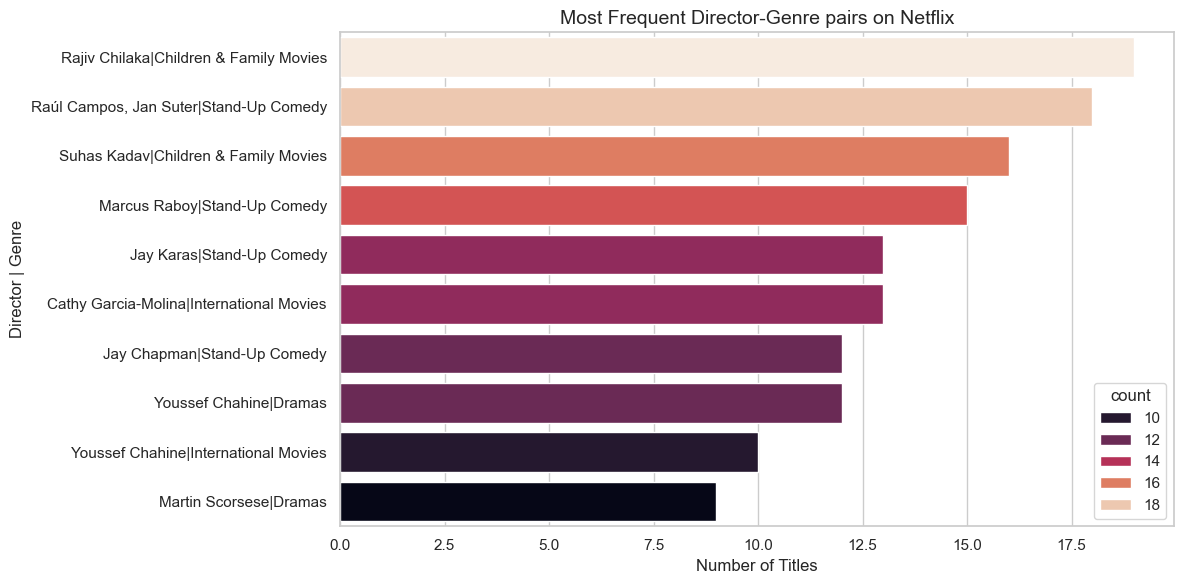

In [71]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(
            x=top_director_genre.values,
            y=top_director_genre.index,
            hue=top_director_genre,
            palette='rocket')
plt.title('Most Frequent Director-Genre pairs on Netflix',fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Director | Genre')
plt.tight_layout()
plt.show()

### Insight:
-Certain directors consistently produce content within specific genres.<br>
-Strong director-genre specialization exists on Netflix (e.g.,directors repeatedly working in Drama, Action, or Comdey).<br>
-These recurring combinations indicate proven creative formulas that perform well with audiences.<br>
-Netflix relies on these pairs to ensure predictable quality and viewer satisfaction.<br>

### Business Recommendation:
-Netflix should prioritize repeat collaborations with directors who perform well in specific genres.<br>
-Genre-specialist directors can be assigned long-term projects to maintain content quality.<br>
-Marketing campaigns can highlight director-genre branding (e.g., "From the director of top Drama hits").<br>
-Encourage new directors to work alongside proven genre leaders to transfer expertise.

### 14. How many titles have unknown directors or cast members?

In [72]:
unknown_director_count=df['director'].isna().sum()+\
(df['director'].str.strip().str.lower()=='unknown').sum()

In [73]:
unknown_cast_count=df['cast'].isna().sum()+\
(df['cast'].str.strip().str.lower()=='unknown').sum()

In [74]:
unknown_data=pd.DataFrame({'Category':['Unknown Diretor', 'Unknown Cast'],'Number of Titles':[unknown_director_count, unknown_cast_count]})

In [75]:
print(unknown_data)

          Category  Number of Titles
0  Unknown Diretor              2634
1     Unknown Cast               825


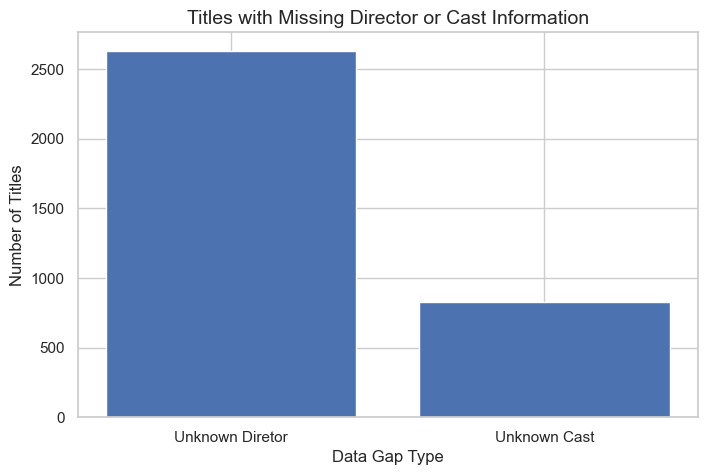

In [76]:
fig,ax=plt.subplots(figsize=(8,5))
plt.bar(unknown_data['Category'], unknown_data['Number of Titles'])
plt.title('Titles with Missing Director or Cast Information',fontsize=14)
plt.ylabel('Number of Titles')
plt.xlabel('Data Gap Type')
plt.show()

### Insight:
A large proportion of Natflix titles have missing director information, significabtly higher than titles with missing cast detailes. This indicates that metadata related to directors is more incomplete, especially for older, regional, or non-mainstream content.

### Business Recommendation:
Netflix should prioritize enrichining director metadata, particularly for titles with high viewership potential, as complete creator information improves content discoverability, personalization accuracy, and user trust in recommendations.

### 15. What is the average duration of Movies on Netflix?

In [77]:
movies_df=df[df['type']=='Movie'].copy()

In [78]:
movies_df['duration_min']=(movies_df['duration'].str.replace('min','', regex=False))

In [79]:
movies_df['duration_min']=pd.to_numeric(movies_df['duration_min'],errors='coerce')

In [80]:
movies_df=movies_df.dropna(subset=['duration_min'])

In [81]:
avg_duration=movies_df['duration_min'].mean()
avg_duration

np.float64(99.57718668407311)

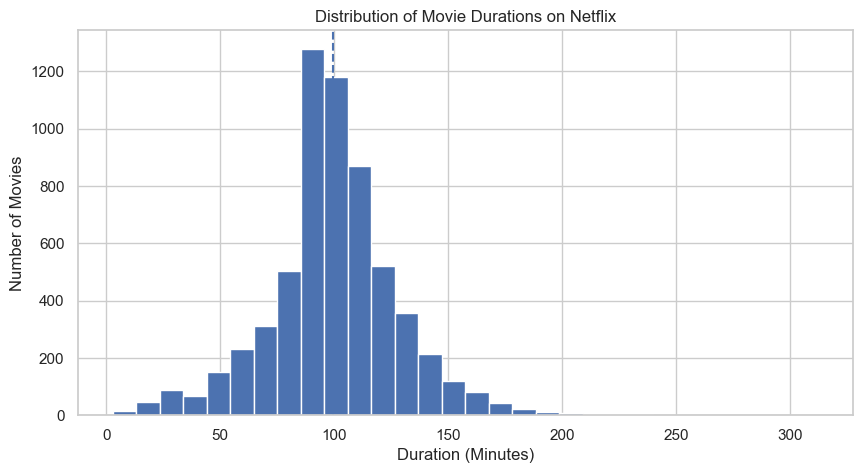

In [82]:
fig,ax=plt.subplots(figsize=(10,5))
plt.hist(movies_df['duration_min'], bins=30)
plt.axvline(avg_duration, linestyle='--')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

### Insight:
- The average duration of Netflix movies is **approximately 100 minutes**.<br>
- Most movies fall between **90-120 minutes**, indicating a strong preferences for standard feature-length films.

### Business Recommendation:
- Netflix should prioritize producing and acquiring movies in the **90-120 minute range** to align with viewer attention spans.<br>
- Avoid excessive long runtimes unless content is premium or franchise-based.<br>
- This duration optimizes **completion rates, engagement, and satisfaction**.

### 16. What's the most common number of seasons for TV shows on Netflix?

In [83]:
tv_df=df[df['type']=='TV Show'].copy()

In [84]:
tv_df['seasons']=tv_df['duration'].str.extract('(\d+)').astype(int)

In [85]:
seasons_counts=tv_df['seasons'].value_counts().sort_index()

In [86]:
most_common_seasons=seasons_counts.idxmax()
most_common_count=seasons_counts.max()
print(f"Most common number of seasons: {most_common_seasons}")
print(f"Number of show with this season count: {most_common_count}")

Most common number of seasons: 1
Number of show with this season count: 1793


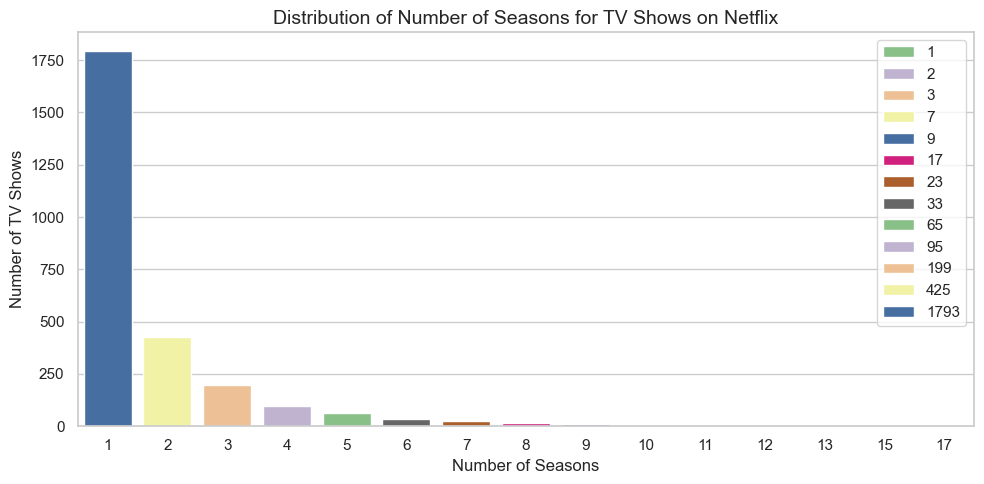

In [87]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=seasons_counts.index, 
            y=seasons_counts.values,
            hue=seasons_counts.values,
            palette='Accent')
plt.title('Distribution of Number of Seasons for TV Shows on Netflix',fontsize=14)
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()

### Insight:
- Netflix's TV catalog is dominated by 1-season shows.<br>
- Indicates a strong preference for:<br>
     - Mini-series<br>
     - Experimental content<br>
     - Limited-run storytelling<br>
- Multi-season long-running shows are less common.

### Business Recommendation:
- Continue investing in limited series.<br>
     - Lower production risk.<br>
     - Faster content turnaround.<br>
     - Higher completion rates.<br>
- Use 1-season shows to test audience interest.<br>
      * Renew only high-performing titles.<br>
- For successful genres, selectively fund multi-season expansions.<br>
- Promote limited series heavily as "complete stories" to boost binge-watching.

### 17. Is there a trend in movie durations over the years?

In [88]:
movies_df=df[df['type']=='Movie'].copy()

In [89]:
movies_df['duration_min']=movies_df['duration'].str.extract('(\d+)').astype(float)

In [90]:
movies_df=movies_df.dropna(subset=['duration_min', 'release_year'])

In [91]:
avg_duration_per_year=(movies_df.groupby('release_year')['duration_min'].mean().reset_index())

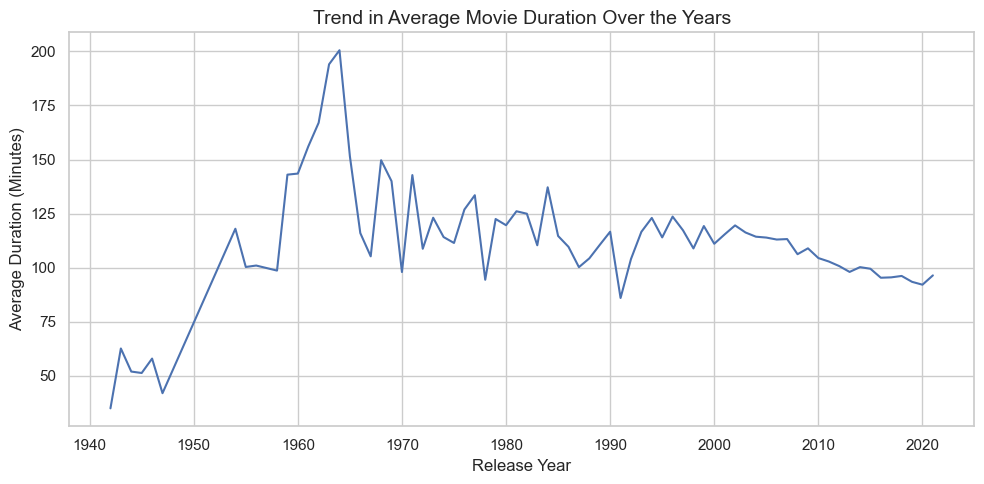

In [92]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(data=avg_duration_per_year,
             x='release_year',
             y='duration_min')
plt.title('Trend in Average Movie Duration Over the Years',fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.tight_layout()
plt.show()

### Insight:
The average movie duration on Netflix has remained relatively stable over the years, with a slight downward trend in recent years. This suggests a gradual shift toward shorter, more concise movies, possibly reflecting changing viewer attention spans and mobile-first consumption habits.

### Business Recommendation:
Netflix should continue investing in movies with durations around 90-110 minutes, as this range aligns with viewer preferences. Additionally, expermenting with shorter movie formats could improve completion rates and engagement, especially for younger and mobile-centric audiences.

### 18. In which months does Netflix add the most content?

In [93]:
month_df=df.copy()

In [94]:
month_df['date_added']=pd.to_datetime(month_df['date_added'], errors='coerce')

In [95]:
month_df['month_added']=month_df['date_added'].dt.month_name()

In [96]:
month_counts=(month_df['month_added'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

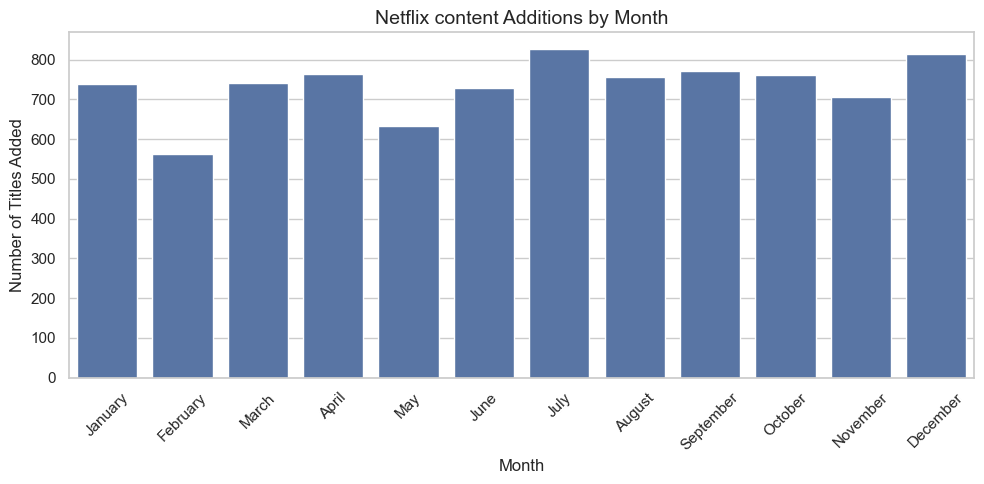

In [97]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xticks(rotation=45)
plt.title('Netflix content Additions by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()

### Insight:
Netflix adds the highest number of titles during **October, November, and December**. This indicates a strong push of new content toward the **end of the year, likely to capitalize on holiday seasons and increased viewer engagement during festive periods.

### Business Recommendation:
Netflix should align its **marketing campaigns, promotional banners, and premium releases** around high-content months to maximize audience engagement. For slower months, Netflix can introduce **targeted promotions or surprise drops** to maintain consistent subscriber activity throughout the year. 

### 19. How does the genre distribution vary across different years?

In [98]:
genre_year_df=df[['listed_in', 'release_year']].dropna().copy()

In [99]:
genre_year_df['listed_year']=genre_year_df['listed_in'].str.split(',')

In [100]:
genre_year_df=genre_year_df.explode('listed_in')

In [101]:
genre_year_df['listed_in']=genre_year_df['listed_in'].str.strip()

In [102]:
recent_years=genre_year_df[genre_year_df['release_year']>=2015]

In [103]:
genre_trend=(recent_years.groupby(['release_year', 'listed_in']).size().reset_index(name='count'))

In [104]:
top_genres=(genre_trend.groupby('listed_in')['count'].sum().sort_values(ascending=False).head(5).index)
genre_trend=genre_trend[genre_trend['listed_in'].isin(top_genres)]

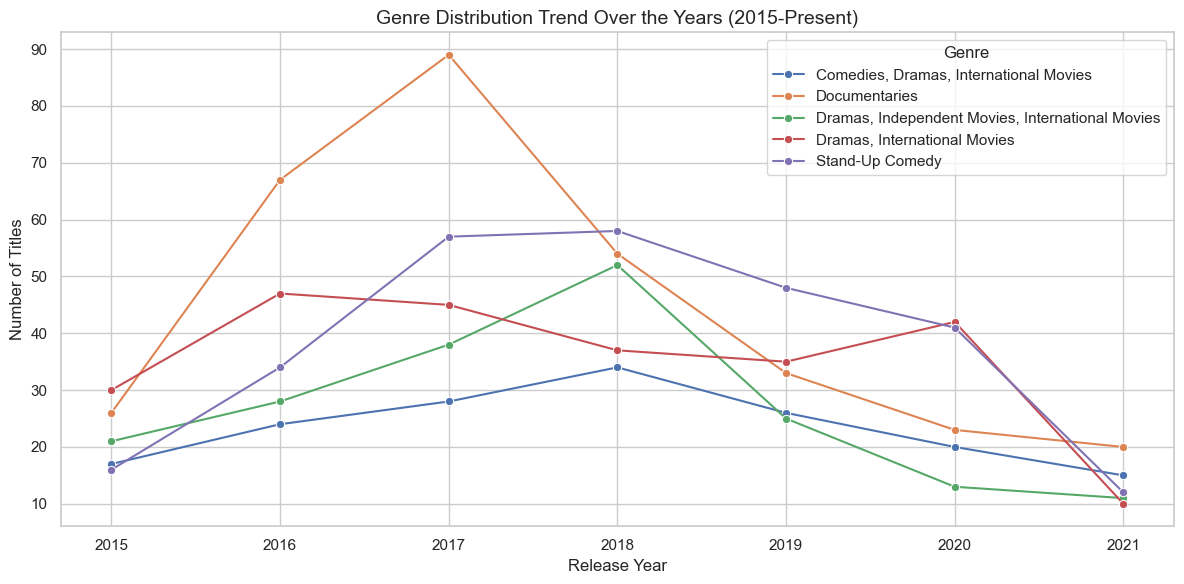

In [105]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(data=genre_trend,
             x='release_year',
             y='count',
             hue='listed_in',
             marker='o')
plt.title('Genre Distribution Trend Over the Years (2015-Present)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

### Insight:
- Genres like **Drama** and **International Movies** consistently dominate across years, showing Netflix's focus on **story-driven and global content**.<br>
- **Documentires** and **Comedies** show noticeable growth in recent years, indicating rising demand for **informative** and **light entertainment** content.<br>
- Some genres fluctuate, suggesting Netflix experiments with content based on **viewer trends and regional preferences**.<br>

### Business Recommendation:
- Netflix should **continue investing in high-performing genres** such as **Drama and International content**, as they show long-term stability.<br>
- The growing trend in **Documentries** suggests an opportunity to expand **real-world, educational, and issue-based storytelling**.<br>
- Genres with declining or fluctuating trends should be **tested via limited release** before large-scale investment, reducing risk while still innovating. 

### 20. Which countiries produce the most content in each genre?

In [106]:
country_genre_df=df[['country', 'listed_in']].dropna().copy()

In [107]:
country_genre_df['country']=country_genre_df['country'].str.split(',')
country_genre_df['listed_in']=country_genre_df['listed_in'].str.split(',')

In [108]:
country_genre_df=country_genre_df.explode('country').explode('listed_in')

In [109]:
country_genre_df['country']=country_genre_df['country'].str.strip()
country_genre_df['listed_in']=country_genre_df['listed_in'].str.strip()

In [110]:
country_genre_count=(country_genre_df.groupby(['listed_in', 'country']).size().reset_index(name='count'))

In [111]:
top_country_per_genre=country_genre_count.loc[country_genre_count.groupby('listed_in')['count'].idxmax()].sort_values('count', ascending=False)
top_country_per_genre.head(10)

,listed_in,country,count
678,International Movies,India,864
497,Dramas,United States,835
232,Comedies,United States,680
372,Documentaries,United States,512
57,Action & Adventure,United States,404
139,Children & Family Movies,United States,390
639,Independent Movies,United States,390
1452,Thrillers,United States,292
1233,TV Comedies,United States,258
1294,TV Dramas,United States,232


### Insight:
- The **United States** dominates production across multiple genres, especially **Dramas, comedies, and Action**.<br>
- **India** emerges as a key producer in **International Movies** and **Romantic genres**, reflecting strong regional storytelling demand.<br>
- Certain genres show **clear geographic specialization**, indicating audience preference differences by region.<br>
- This highlights Netflix's reliance on a few countries for genre leadership, while other regions remain underutilized.<br>

### Business Recommendation:
- Netflix should **strengthen partnerships** with high-performing countries to maintain genre leadership.<br>
- Invest in **local content production** in emerging markets to reduce dependency on a few countires.<br>
- Use genre-country insights to guide **content licensing**, ensuring region-specific catalogs match audience preferences.<br>
- Expand underrespresented genres in high-growth regions to support **international expansion startegy**.

In [113]:
df.to_csv("netflix_powerbi.csv", index=False)